# Project Description

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan. Since you’ve already performed the data preprocessing step, you can move straight to creating the model.

Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.

# Initialization

In [14]:
# Load all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings("ignore")


# Load Data

In [15]:
# Load the data files into different DataFrames
try:
    users_behavior = pd.read_csv('/datasets/users_behavior.csv')
except:
    users_behavior = pd.read_csv('users_behavior.csv')
    

# Explore the Data

In [16]:
# Print general information about the 'names_trips' dataframe
users_behavior.info()
users_behavior.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [17]:
# Print a sample of the data for 'users_behavior'
users_behavior


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


# Develop and Test Models

In [18]:
# Create the training, validation, and test sets that will be used for the following models
features = users_behavior.drop(['is_ultra'], axis=1) # The features consists of all the columns except 'is_ultra'
target = users_behavior['is_ultra'] # The target is the 'is_ultra' column

# Use train_test_split to create the training set (60% of the data) and the remaining data
features_train, features_rem, target_train, target_rem = train_test_split(features,
                                                                          target,
                                                                          train_size = 0.6,
                                                                          random_state = 12345)

# Use train_test_split to split the remaining data into the validation and test set (20% of the data each)
features_valid, features_test, target_valid, target_test = train_test_split(features_rem,
                                                                            target_rem,
                                                                            test_size = 0.5,
                                                                            random_state = 12345)


## Logistic Regression

In [19]:
# Concatenate the training and validation set to create a larger training set
features_train_valid = pd.concat([features_train, features_valid], ignore_index = True)
target_train_valid = pd.concat([target_train, target_valid], ignore_index = True)

# Create the model with the given parameters
model = LogisticRegression(random_state = 12345, solver = 'lbfgs')

model.fit(features_train_valid, target_train_valid) # train the model using the training set
final_score = model.score(features_test, target_test) # calculate model's accuracy score using the test set

print(f'Accuracy of the model on the test set: {final_score}')


Accuracy of the model on the test set: 0.6842923794712286


The above logistic regression model yielded an accuracy score of 0.68 which is under the required threshold of 0.75 for this analysis. This may be due to the fact that the model is very simple and does not really involve hypertuning the parameters as is common in other models.

In [20]:
# Sanity check the model using model evaluation metrics--precision and recall
pred = model.predict(features_test)

precision = precision_score(target_test, pred) # calculate the precision score based on the target and predicted values
print(f'Precision score for decision tree classifier: {precision}')

recall = recall_score(target_test, pred) # calculate the recall score based on the target and predicted values
print(f'Recall score for decision tree classifier: {recall}')



Precision score for decision tree classifier: 0.5
Recall score for decision tree classifier: 0.03940886699507389


In order to sanity check the logistic regression model and ensure that it is functioning properly and performing better than chance, the precision score and recall score was calculated for the model. The precision score represents the ability of the classifier not to label as positive a sample that is negative. The score for this model was 0.5, meaning that the model's predictions included the same number of true positives and false positives. The recall score represents the ability of the classifier to find all the positive samples. The score is 0.04, meaning the model's predictions included fewer true positives than false negatives.

## Decision Tree Classifier

In [21]:
# Create and determine the accuracy of a Decision Tree Classifier model

# Create a for loop to tune the model's max depth and identify the depth that produces the highest accuracy score
best_model = None
best_score = 0
scores = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth) # create a model with the given depth
    model.fit(features_train, target_train) # train the model using the training set
    score = model.score(features_valid, target_valid) # calculate the accuracy using the validation set
    if score > best_score: # identify the best model based on accuracy
        best_model = model
        best_score = score
    scores.append(score) # keep a running list of the accuracy scores by depth
        
print("Accuracy of the best model on the validation set:", best_score)

best_model.fit(features_train, target_train) # train the best model using the training set
final_score = best_model.score(features_test, target_test) # calculate best model's accuracy score using the test set

print(f'Accuracy of the best model on the test set: {final_score}')


Accuracy of the best model on the validation set: 0.7853810264385692
Accuracy of the best model on the test set: 0.7791601866251944


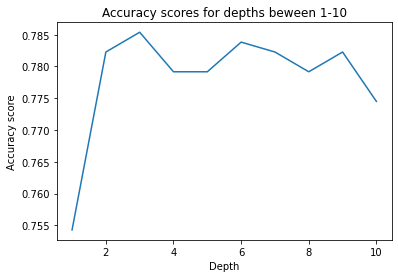

In [22]:
# Plot the accuracy scores for depths between 1-10 to identify trends
plt.plot(range(1, 11), scores)
plt.title('Accuracy scores for depths beween 1-10')
plt.xlabel('Depth')
plt.ylabel('Accuracy score')
plt.show()


The Decision Tree Classifier model above performed a little better in terms of accuracy than the Logistic Regression model with a score of 0.78, slightly above the 0.75 threshold which means that it is acceptable for the purposes of this analysis. In order to maximize the accuracy, tree depths between 1-10 were visualized and tested to choose the best performing depth in the final model. Decision Tree models can be a little tricky as tree depths that are too low may cause underfitting while tree depths that are too high may cause overfitting. This method of looping through various options helped to select the best possible combination resulting in the highest level of accuracy.

In [23]:
# Sanity check the model using model evaluation metrics--precision and recall
pred = best_model.predict(features_test)

precision = precision_score(target_test, pred) # calculate the precision score based on the target and predicted values
print(f'Precision score for decision tree classifier: {precision}')

recall = recall_score(target_test, pred)
print(f'Recall score for decision tree classifier: {recall}') # calculate the recall score based on the target and predicted values


Precision score for decision tree classifier: 0.744
Recall score for decision tree classifier: 0.458128078817734


A sanity check was also preformed on the decision tree classifer model and yielded a score of 0.74 which is better than the logistic regression model. The recall score was found to be 0.46 which is also much better than the logistic regression model, but still not great as the model's predictions included fewer true positives than false negatives.

## Random Forest Classifier

In [24]:
# Create and determine the accuracy of a Random Forest Classifier model

# Create a for loop to tune the model's number of estimators and identify the number that produces the highest accuracy score
best_score = 0
best_est = 0
scores = []

for est in range(1, 51): # choose hyperparameter range
    model = RandomForestClassifier(random_state = 12345, n_estimators = est) # set number of trees
    model.fit(features_train, target_train) # train model on training set
    score = model.score(features_valid, target_valid) # calculate accuracy score on validation set
    if score > best_score:
        best_score = score # save best accuracy score on validation set
        best_est = est # save number of estimators corresponding to best accuracy score
    scores.append(score) # keep a running list of the accuracy scores by estimators

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

final_model = RandomForestClassifier(random_state = 12345, n_estimators = best_est)
final_model.fit(features_train, target_train) # train the best model using the training set
final_score = final_model.score(features_test, target_test) # calculate best model's accuracy score using the test set

print(f'Accuracy of the best model on the test set: {final_score}')


Accuracy of the best model on the validation set (n_estimators = 23): 0.7947122861586314
Accuracy of the best model on the test set: 0.7807153965785381


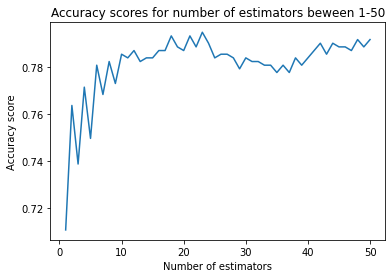

In [25]:
# Plot the accuracy scores for estimators between 1-50 to identify trends
plt.plot(range(1, 51), scores)
plt.title('Accuracy scores for number of estimators beween 1-50')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy score')
plt.show()


The Random Forest Classifier performed the best of the 3 models with an accuracy of 0.78, a tad higher than what was yielded from the Decision Tree Classifier. The model was tuned by looping through the number of estimators (trees) employed in the model between 1-50 to select the number that would yield the highest accuracy score. Based on the visualization, the best number of estimators was 23 which was the value used in the final model. Random Forest models often have the highest accuracy because they use an ensemble of trees instead of just one. 

In [26]:
# Sanity check the model using model evaluation metrics--precision and recall
pred = final_model.predict(features_test)

precision = precision_score(target_test, pred) # calculate the precision score based on the target and predicted values
print(f'Precision score for random forest classifier: {precision}')

recall = recall_score(target_test, pred)
print(f'Recall score for random forest classifier: {recall}') #calculate the recall score based on the target and predicted values


Precision score for random forest classifier: 0.6781609195402298
Recall score for random forest classifier: 0.5812807881773399


A sanity check was also preformed on the Random Forest Classifer model and yielded a score of 0.68 which is indicates that it does a a little worse at avoiding false positive classifications than the Decision Tree Classifier. The recall score was found to be 0.58 which is the highest value found in all three models, but still predicting just a few more true positives than false negatives.

# Conclusion

-Logistic Regression Model: Accuracy Score--0.68; Precision Score--0.5; Recall Score--0.04

-Decision Tree Classifier: Accuracy Score--0.779; Precision Score--0.74; Recall Score--0.46

-Random Forest Classifier: Accuracy Score--0.78; Precision Score--0.68; Recall Score--0.58

Recommendation: Megaline should utilize the **Random Forest Classifier Model** to help recommend plans to their customers as it has the highest accuracy of the 3 investigated models and had precision and recall scores higher than 0.50 on the sanity check which helps to show that it is able to make accurate predictions better than chance.